In [235]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier as Knn
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB
from scipy.stats import ttest_ind
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ttest_rel
from scipy.stats import chisquare
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import ranksums
from sklearn.model_selection import KFold
from sklearn.svm import SVR


In [9]:
Data = pd.read_csv(r"C:\Users\princ\Desktop\Datamining dataset\suggested datasets\HRDataset_v14.csv")


In [10]:

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 10)
display(Data)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


array([[<AxesSubplot:title={'center':'EmpID'}>,
        <AxesSubplot:title={'center':'MarriedID'}>,
        <AxesSubplot:title={'center':'MaritalStatusID'}>,
        <AxesSubplot:title={'center':'GenderID'}>],
       [<AxesSubplot:title={'center':'EmpStatusID'}>,
        <AxesSubplot:title={'center':'DeptID'}>,
        <AxesSubplot:title={'center':'PerfScoreID'}>,
        <AxesSubplot:title={'center':'FromDiversityJobFairID'}>],
       [<AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'Termd'}>,
        <AxesSubplot:title={'center':'PositionID'}>,
        <AxesSubplot:title={'center':'Zip'}>],
       [<AxesSubplot:title={'center':'ManagerID'}>,
        <AxesSubplot:title={'center':'EngagementSurvey'}>,
        <AxesSubplot:title={'center':'EmpSatisfaction'}>,
        <AxesSubplot:title={'center':'SpecialProjectsCount'}>],
       [<AxesSubplot:title={'center':'DaysLateLast30'}>,
        <AxesSubplot:title={'center':'Absences'}>, <AxesSubplot:>,
        <Axes

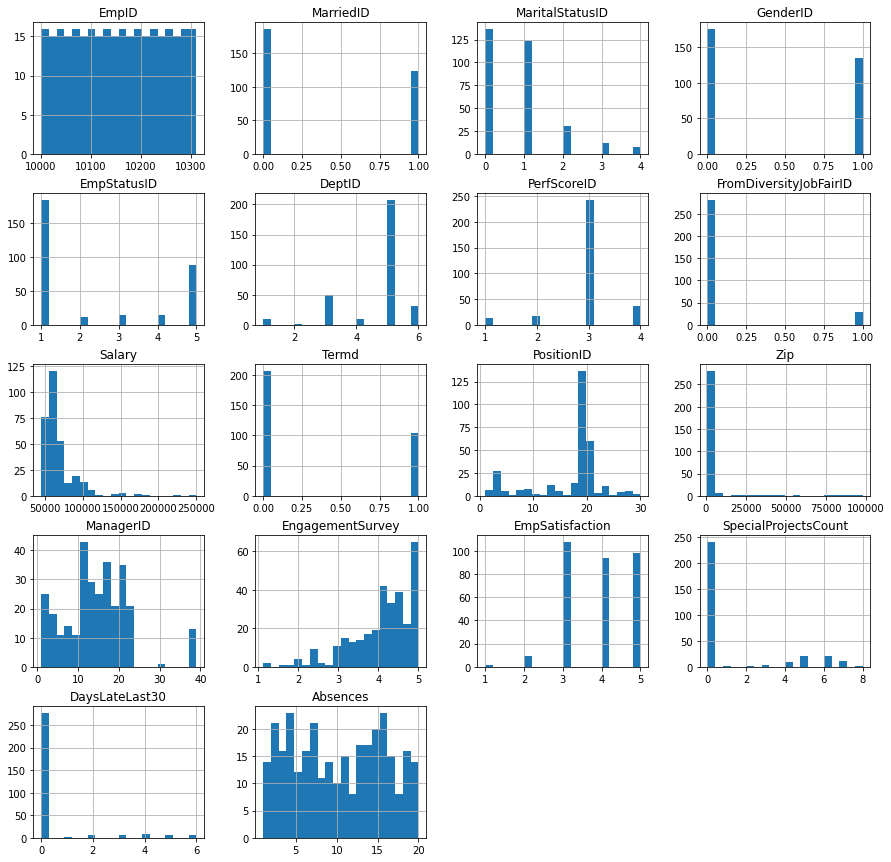

In [15]:
print(Data.hist(bins = 20,figsize = 
         (15,15)))

In [28]:
Data["PerformanceScore"]

0          Exceeds
1      Fully Meets
2      Fully Meets
3      Fully Meets
4      Fully Meets
          ...     
306    Fully Meets
307            PIP
308        Exceeds
309    Fully Meets
310    Fully Meets
Name: PerformanceScore, Length: 311, dtype: object

In [13]:
corr =  Data.corr("spearman", numeric_only = True)
display(corr.style.background_gradient(cmap='coolwarm'))

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
EmpID,1.000000,0.048058,-0.026200,0.035914,0.070279,0.115685,-0.719963,0.046805,-0.090664,0.092389,-0.019799,0.000972,0.111075,-0.575832,-0.117568,-0.043166,0.520524,-0.022735
MarriedID,0.048058,1.000000,0.427917,-0.024199,0.092819,-0.090471,-0.062981,-0.012708,0.040122,0.077028,-0.052711,-0.038735,-0.134850,-0.095481,-0.137422,0.068820,0.015532,0.099561
MaritalStatusID,-0.026200,0.427917,1.000000,-0.032485,0.149432,-0.015432,0.024798,0.054369,-0.026084,0.130746,-0.027228,-0.071465,-0.028867,-0.014511,-0.033036,-0.033476,-0.057763,0.046212
GenderID,0.035914,-0.024199,-0.032485,1.000000,-0.042080,-0.029070,-0.036790,0.031493,0.073021,-0.015741,-0.091478,-0.010949,-0.034803,-0.007504,-0.053419,0.080150,0.095784,-0.008830
EmpStatusID,0.070279,0.092819,0.149432,-0.042080,1.000000,0.041233,-0.091740,0.194544,-0.104373,0.911145,0.235884,-0.029460,0.150747,0.011427,0.010365,-0.172321,0.048021,0.084085
DeptID,0.115685,-0.090471,-0.015432,-0.029070,0.041233,1.000000,-0.085202,-0.095777,-0.360953,0.036502,-0.093535,0.263933,0.589086,-0.091243,0.036437,-0.813917,0.163705,0.053996
PerfScoreID,-0.719963,-0.062981,0.024798,-0.036790,-0.091740,-0.085202,1.000000,0.014504,0.088172,-0.113690,-0.006069,-0.030629,-0.072689,0.376291,0.208514,0.027501,-0.681864,0.022166
FromDiversityJobFairID,0.046805,-0.012708,0.054369,0.031493,0.194544,-0.095777,0.014504,1.000000,0.003202,0.147717,-0.001681,-0.093003,-0.053710,-0.031204,-0.036240,0.047365,0.064868,0.061927
Salary,-0.090664,0.040122,-0.026084,0.073021,-0.104373,-0.360953,0.088172,0.003202,1.000000,-0.094249,0.033720,0.013084,-0.461809,0.031117,0.040271,0.506866,-0.066890,0.079194
Termd,0.092389,0.077028,0.130746,-0.015741,0.911145,0.036502,-0.113690,0.147717,-0.094249,1.000000,0.142203,-0.003417,0.121338,-0.008226,-0.007605,-0.146121,0.115966,0.103367


In [17]:
corr =  Data.corr("kendall", numeric_only = True)
display(corr.style.background_gradient(cmap='coolwarm'))

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
EmpID,1.000000,0.039302,-0.020265,0.029371,0.055183,0.089135,-0.607752,0.038278,-0.061489,0.075557,-0.010673,0.000000,0.075547,-0.459910,-0.091398,-0.032357,0.419273,-0.017461
MarriedID,0.039302,1.000000,0.404110,-0.024199,0.088507,-0.085914,-0.061003,-0.012708,0.032813,0.077028,-0.047056,-0.031796,-0.113243,-0.079733,-0.128287,0.065927,0.015203,0.083447
MaritalStatusID,-0.020265,0.404110,1.000000,-0.030678,0.135286,-0.013963,0.022892,0.051344,-0.020161,0.123472,-0.021404,-0.055627,-0.023582,-0.008890,-0.028084,-0.030361,-0.053987,0.036828
GenderID,0.029371,-0.024199,-0.030678,1.000000,-0.040125,-0.027606,-0.035635,0.031493,0.059719,-0.015741,-0.081664,-0.008987,-0.029226,-0.006266,-0.049868,0.076781,0.093755,-0.007401
EmpStatusID,0.055183,0.088507,0.135286,-0.040125,1.000000,0.038647,-0.084530,0.185505,-0.080462,0.868812,0.199484,-0.022799,0.121955,0.009234,0.009092,-0.157257,0.044748,0.066942
DeptID,0.089135,-0.085914,-0.013963,-0.027606,0.038647,1.000000,-0.078055,-0.090952,-0.269174,0.034663,-0.076915,0.204926,0.490350,-0.072527,0.032301,-0.739337,0.151407,0.043879
PerfScoreID,-0.607752,-0.061003,0.022892,-0.035635,-0.084530,-0.078055,1.000000,0.014049,0.070223,-0.110120,-0.004953,-0.024498,-0.058628,0.309069,0.190367,0.025209,-0.647934,0.018867
FromDiversityJobFairID,0.038278,-0.012708,0.051344,0.031493,0.185505,-0.090952,0.014049,1.000000,0.002619,0.147717,-0.001500,-0.076341,-0.045104,-0.026057,-0.033831,0.045374,0.063494,0.051905
Salary,-0.061489,0.032813,-0.020161,0.059719,-0.080462,-0.269174,0.070223,0.002619,1.000000,-0.077080,0.054887,0.010891,-0.315531,0.021360,0.030117,0.393345,-0.053932,0.053300
Termd,0.075557,0.077028,0.123472,-0.015741,0.868812,0.034663,-0.110120,0.147717,-0.077080,1.000000,0.126947,-0.002804,0.101896,-0.006869,-0.007100,-0.139979,0.113510,0.086637


In [18]:
data = Data
data = data.drop(["DeptID"], axis = 1)
data = data.drop(["GenderID"], axis = 1)
data = data.drop(["Termd"], axis = 1)
data = data.drop(["Zip"], axis = 1)
data = data.drop(["EmpStatusID"], axis = 1)
data = data.drop(["FromDiversityJobFairID"],axis = 1)
data = data.drop(["PositionID"],axis = 1)
data = data.drop(["EmpID"],axis = 1)
data = data.drop(["MarriedID"],axis = 1)
data= data.drop(["MaritalStatusID"],axis = 1)
data= data.drop(["Absences"], axis = 1)
data= data.drop(["ManagerID"], axis = 1)

In [19]:
len(data)

311

In [20]:
display(data.describe())

,PerfScoreID,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,2.977492,69020.684887,4.110000,3.890675,1.218650,0.414791
std,0.587072,25156.636930,0.789938,0.909241,2.349421,1.294519
min,1.000000,45046.000000,1.120000,1.000000,0.000000,0.000000
25%,3.000000,55501.500000,3.690000,3.000000,0.000000,0.000000
50%,3.000000,62810.000000,4.280000,4.000000,0.000000,0.000000
75%,3.000000,72036.000000,4.700000,5.000000,0.000000,0.000000
max,4.000000,250000.000000,5.000000,5.000000,8.000000,6.000000


In [11]:
print(data.hist(bins=50, figsize=(25, 25)))

SyntaxError: unexpected EOF while parsing (2389493992.py, line 1)

<AxesSubplot:>

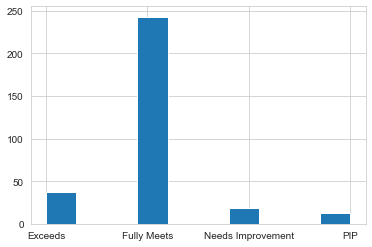

In [1424]:
display(data["PerformanceScore"].hist())

<AxesSubplot:>

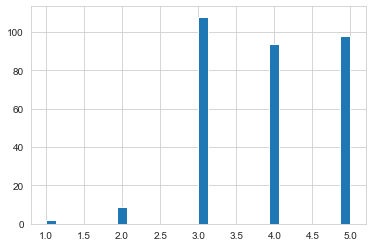

In [1425]:
display(data["EmpSatisfaction"].hist(bins = 30))

<AxesSubplot:>

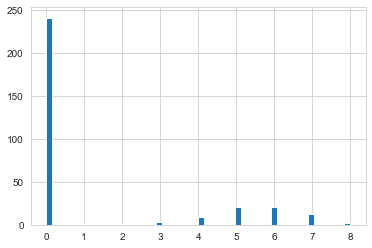

In [1426]:
display(data["SpecialProjectsCount"].hist(bins = 50))

<AxesSubplot:>

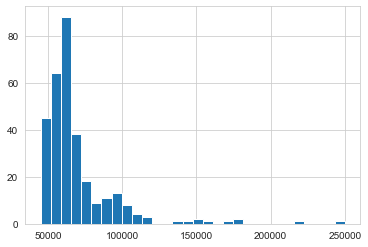

In [1427]:
display(data["Salary"].hist(bins = 30))

<AxesSubplot:>

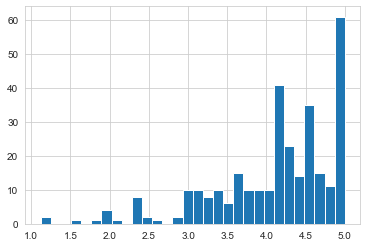

In [1428]:
display(data["EngagementSurvey"].hist(bins = 30))

<AxesSubplot:>

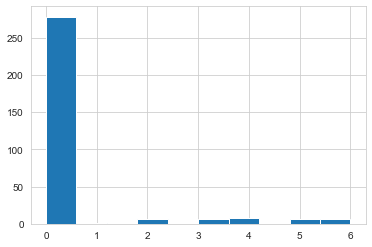

In [1429]:
display(data["DaysLateLast30"].hist())

In [1430]:
print(data.corr("kendall")["Salary"])

PerfScoreID             0.070223
Salary                  1.000000
ManagerID              -0.315531
EngagementSurvey        0.021360
EmpSatisfaction         0.030117
SpecialProjectsCount    0.393345
DaysLateLast30         -0.053932
Name: Salary, dtype: float64

In [1431]:
print(data.corr("kendall")["PerfScoreID"])

PerfScoreID             1.000000
Salary                  0.070223
ManagerID              -0.058628
EngagementSurvey        0.309069
EmpSatisfaction         0.190367
SpecialProjectsCount    0.025209
DaysLateLast30         -0.647934
Name: PerfScoreID, dtype: float64

In [1432]:
print(data.corr("kendall")["EmpSatisfaction"])

PerfScoreID             0.190367
Salary                  0.030117
ManagerID               0.095144
EngagementSurvey        0.098420
EmpSatisfaction         1.000000
SpecialProjectsCount    0.010048
DaysLateLast30         -0.189672
Name: EmpSatisfaction, dtype: float64

In [1433]:
print(data.corr("kendall")["SpecialProjectsCount"])

PerfScoreID             0.025209
Salary                  0.393345
ManagerID              -0.470370
EngagementSurvey        0.016251
EmpSatisfaction         0.010048
SpecialProjectsCount    1.000000
DaysLateLast30         -0.067538
Name: SpecialProjectsCount, dtype: float64

In [1434]:
print(data.corr("kendall")["DaysLateLast30"])

PerfScoreID            -0.647934
Salary                 -0.053932
ManagerID               0.058988
EngagementSurvey       -0.349876
EmpSatisfaction        -0.189672
SpecialProjectsCount   -0.067538
DaysLateLast30          1.000000
Name: DaysLateLast30, dtype: float64

In [1435]:
print(data.corr("kendall")["EngagementSurvey"])

PerfScoreID             0.309069
Salary                  0.021360
ManagerID              -0.016855
EngagementSurvey        1.000000
EmpSatisfaction         0.098420
SpecialProjectsCount    0.016251
DaysLateLast30         -0.349876
Name: EngagementSurvey, dtype: float64

In [1436]:
print("Shapiro test SpecialProjectsCount",shapiro(data["SpecialProjectsCount"]))
print("\nShapiro test Performance score",shapiro(data["PerfScoreID"]))
print("\nShapiro test Salary",shapiro(data["Salary"]))
print("\nShapiro test Employmee Satisfaction",shapiro(data["EmpSatisfaction"]))
print("\nShapiro test 30 Days late",shapiro(data["DaysLateLast30"]))
print("\nShapiro test Engagement Survey",shapiro(data["EngagementSurvey"]))

Shapiro test SpecialProjectsCount ShapiroResult(statistic=0.5542750358581543, pvalue=2.090122598087042e-27)

Shapiro test Performance score ShapiroResult(statistic=0.6243441104888916, pvalue=1.529087919337566e-25)

Shapiro test Salary ShapiroResult(statistic=0.6854951977729797, pvalue=1.1153204989966881e-23)

Shapiro test Employmee Satisfaction ShapiroResult(statistic=0.8421188592910767, pvalue=3.660982938895983e-17)

Shapiro test 30 Days late ShapiroResult(statistic=0.3571956753730774, pvalue=1.2442778150134783e-31)

Shapiro test Engagement Survey ShapiroResult(statistic=0.901082456111908, pvalue=2.2056231081986344e-13)


G:\Programs\Anaconda\Anaconda\envs\AILearningv2\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

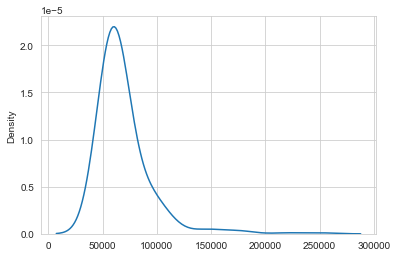

In [1437]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
display(sns.kdeplot(np.array(data["Salary"]), bw=0.5))


G:\Programs\Anaconda\Anaconda\envs\AILearningv2\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

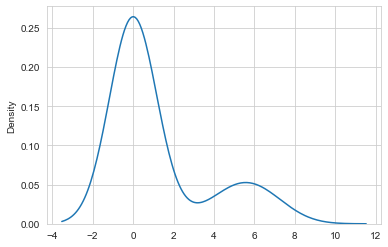

In [1438]:
sns.set_style('whitegrid')
display(sns.kdeplot(np.array(data["SpecialProjectsCount"]), bw=0.5))

G:\Programs\Anaconda\Anaconda\envs\AILearningv2\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

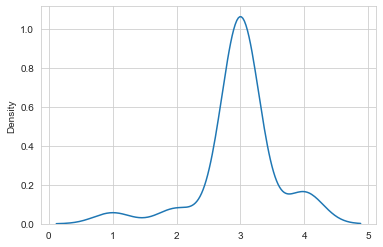

In [1439]:
sns.set_style('whitegrid')
display(sns.kdeplot(np.array(data["PerfScoreID"]), bw=0.5))

G:\Programs\Anaconda\Anaconda\envs\AILearningv2\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

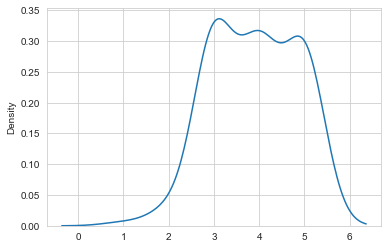

In [1440]:
sns.set_style('whitegrid')
display(sns.kdeplot(np.array(data["EmpSatisfaction"]), bw=0.5))

G:\Programs\Anaconda\Anaconda\envs\AILearningv2\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

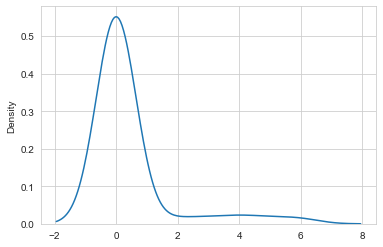

In [1441]:
sns.set_style('whitegrid')
display(sns.kdeplot(np.array(data["DaysLateLast30"]), bw=0.5))


G:\Programs\Anaconda\Anaconda\envs\AILearningv2\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

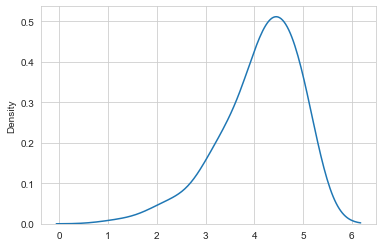

In [1442]:
sns.set_style('whitegrid')
display(sns.kdeplot(np.array(data["EngagementSurvey"]), bw=0.5))


In [1487]:
corr = data.corr("kendall")
display(corr.style.background_gradient(cmap='coolwarm'))

,PerfScoreID,Salary,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30
PerfScoreID,1.000000,0.070223,-0.058628,0.309069,0.190367,0.025209,-0.647934
Salary,0.070223,1.000000,-0.315531,0.021360,0.030117,0.393345,-0.053932
ManagerID,-0.058628,-0.315531,1.000000,-0.016855,0.095144,-0.470370,0.058988
EngagementSurvey,0.309069,0.021360,-0.016855,1.000000,0.098420,0.016251,-0.349876
EmpSatisfaction,0.190367,0.030117,0.095144,0.098420,1.000000,0.010048,-0.189672
SpecialProjectsCount,0.025209,0.393345,-0.470370,0.016251,0.010048,1.000000,-0.067538
DaysLateLast30,-0.647934,-0.053932,0.058988,-0.349876,-0.189672,-0.067538,1.000000


In [1444]:
corr = data.corr("spearman")
display(corr.style.background_gradient(cmap='coolwarm'))

,PerfScoreID,Salary,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30
PerfScoreID,1.000000,0.088172,-0.072689,0.376291,0.208514,0.027501,-0.681864
Salary,0.088172,1.000000,-0.461809,0.031117,0.040271,0.506866,-0.066890
ManagerID,-0.072689,-0.461809,1.000000,-0.026126,0.121873,-0.583956,0.072012
EngagementSurvey,0.376291,0.031117,-0.026126,1.000000,0.124273,0.021082,-0.426366
EmpSatisfaction,0.208514,0.040271,0.121873,0.124273,1.000000,0.011738,-0.208183
SpecialProjectsCount,0.027501,0.506866,-0.583956,0.021082,0.011738,1.000000,-0.072020
DaysLateLast30,-0.681864,-0.066890,0.072012,-0.426366,-0.208183,-0.072020,1.000000


<AxesSubplot:>

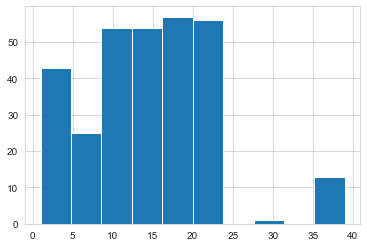

In [1489]:
display(data["ManagerID"].hist())

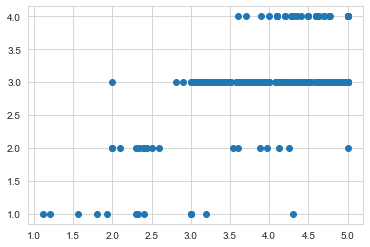

In [1445]:
plt.scatter(data["EngagementSurvey"], data["PerfScoreID"])
plt.xlabel("Engagment survey")
plt.ylabel('Performance score')
plt.show()

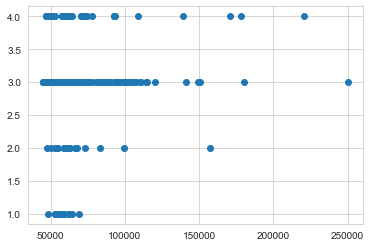

In [1446]:
plt.scatter(data["Salary"], data["PerfScoreID"])
plt.xlabel("Salary $")
plt.ylabel('Score')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1648f3486d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1648f348d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1648f348370>],
 'medians': [<matplotlib.lines.Line2D at 0x1648f356430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1648f356760>],
 'means': []}

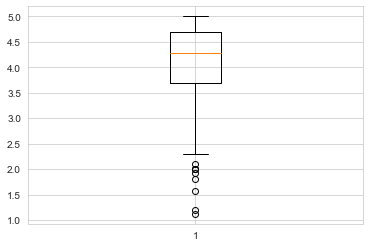

In [1448]:
plt.boxplot(data["EngagementSurvey"])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1648f39ebe0>,
 'caps': [<matplotlib.lines.Line2D at 0x1648f3af2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1648f39e880>],
 'medians': [<matplotlib.lines.Line2D at 0x1648f3af970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1648f3afc40>],
 'means': []}

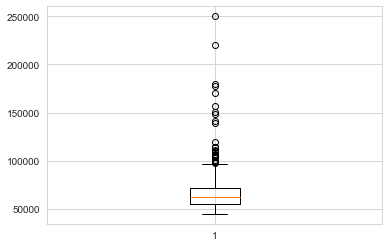

In [1449]:
plt.boxplot(data["Salary"])
plt.show()

# Engagement Survey and Performance score

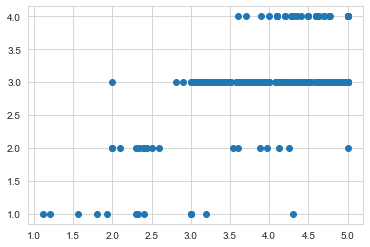

In [724]:
plt.scatter(Data["EngagementSurvey"], Data["PerfScoreID"])
plt.xlabel("Engagement survey")
plt.ylabel("Performance Score")
plt.show()

In [255]:
X = np.array(Data["EngagementSurvey"]).reshape(-1,1)
X = normalization.fit_transform(X)
y = np.array(Data["PerfScoreID"])
kf = KFold(n_splits=5, random_state= 10, shuffle = True )
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=5, random_state=10, shuffle=True)


In [257]:
model= Knn(6)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))


0.7903225806451613


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [153]:
model= LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))


0.7580645161290323


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [154]:
model= RandomForestClassifier(n_estimators = 4, max_depth= 30, criterion ="entropy")
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))


0.7741935483870968


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [155]:
model= GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.7741935483870968


In [156]:
model= SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))


0.7903225806451613


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

# Days late last 30 And performance score

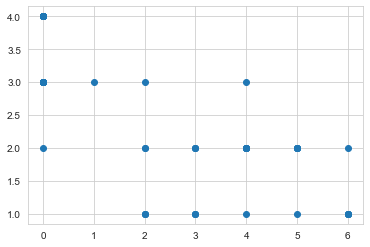

In [725]:
plt.scatter(Data["DaysLateLast30"], Data["PerfScoreID"])
plt.xlabel("Days late last 30 days")
plt.ylabel("Performance Score")
plt.show()

In [157]:
X = np.array(Data["DaysLateLast30"]).reshape(-1,1)
X = normalization.fit_transform(X)
y = np.array(Data["PerfScoreID"])
kf = KFold(n_splits=5, random_state= 10, shuffle = True )
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=5, random_state=10, shuffle=True)


In [176]:
model= Knn(6)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.7741935483870968


In [169]:
model= LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.8064516129032258


In [172]:
model= RandomForestClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))


0.8064516129032258


In [173]:

model= GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))


0.20967741935483872


In [174]:
model= SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.8064516129032258


# Employment Satisfaction And performance score

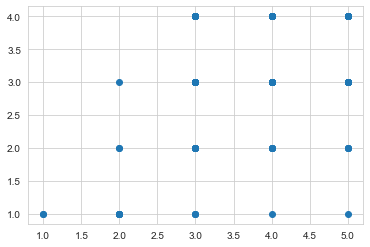

In [811]:
plt.scatter(Data["EmpSatisfaction"], Data["PerfScoreID"])
plt.xlabel("Employee satisfaction")
plt.ylabel("Performance score")
plt.show()

In [225]:
X = np.array(Data["EmpSatisfaction"]).reshape(-1,1)
X = normalization.fit_transform(X)
y = np.array(Data["PerfScoreID"])
kf = KFold(n_splits=5, shuffle = True, random_state=3 )
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=5, random_state=3, shuffle=True)


In [226]:
model= Knn(5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.8225806451612904


In [227]:
model= LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))


0.8064516129032258


In [228]:

model= RandomForestClassifier(100)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.8225806451612904


In [229]:
model= GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.8064516129032258


In [230]:
model= SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.8225806451612904


# EngagementSurvey And DaysLateLast30

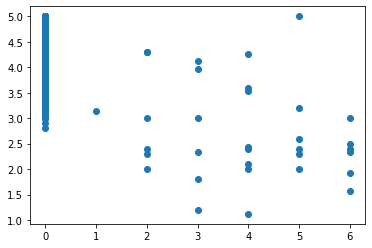

In [231]:
plt.scatter(Data["DaysLateLast30"], Data["EngagementSurvey"])
plt.xlabel("Days late in last 30 days")
plt.ylabel("Engagement Survey")
plt.show()

In [232]:
X = np.array(Data["EngagementSurvey"]).reshape(-1,1)
X = normalization.fit_transform(X)
y = np.array(Data["DaysLateLast30"])
kf = KFold(n_splits=5, shuffle = True, random_state=3 )
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=5, random_state=3, shuffle=True)


0.21080436348215267


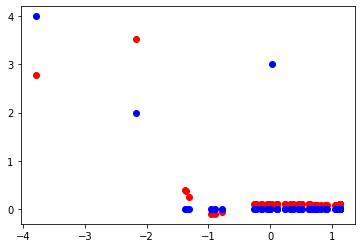

In [238]:
model= SVR()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
plt.scatter(X_test, y_predict, color = "red")
plt.scatter(X_test, y_test, color = "blue")
plt.show()
print(mean_squared_error(y_predict, y_test))

0.41966810623471423


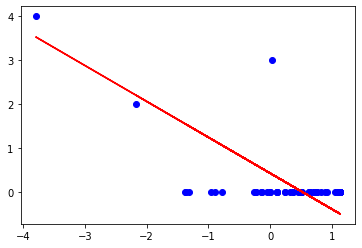

In [240]:
model= LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
plt.plot(X_test, y_predict, color = "red")
plt.scatter(X_test, y_test, color = "blue")
plt.show()
print(mean_squared_error(y_predict, y_test))

0.36519713261648745


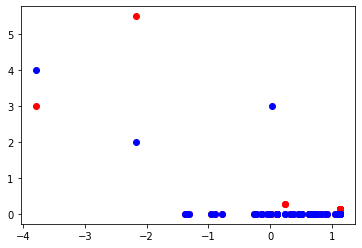

In [249]:
model= DecisionTreeRegressor(max_depth = 60)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
plt.scatter(X_test, y_predict, color = "red")
plt.scatter(X_test, y_test, color = "blue")
plt.show()
print(mean_squared_error(y_predict, y_test))

# Salary and SpecialProjectsCount

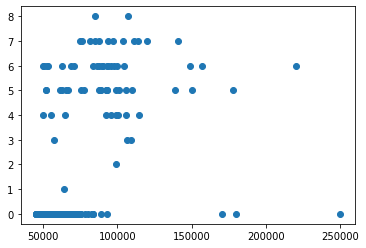

In [26]:
plt.scatter(data["Salary"], data["SpecialProjectsCount"])
plt.xlabel("Salary in $")
plt.ylabel("Special Projects")
plt.show()

In [264]:
X = np.array(Data["Salary"]).reshape(-1,1)
X = normalization.fit_transform(X)
y = np.array(Data["SpecialProjectsCount"])
kf = KFold(n_splits=5, shuffle = True, random_state=3 )
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=5, random_state=3, shuffle=True)


6.51802560695959


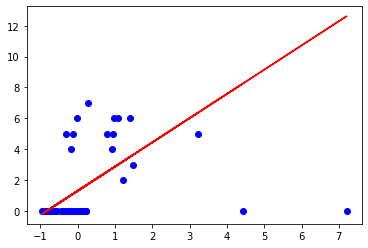

In [265]:
model= LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
plt.plot(X_test, y_predict, color = "red")
plt.scatter(X_test, y_test, color = "blue")
plt.show()
print(mean_squared_error(y_predict, y_test))

3.152425768740549


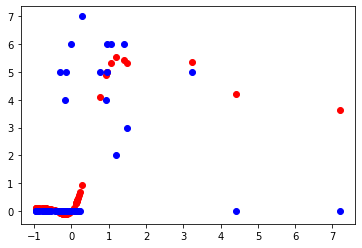

In [266]:
model= SVR()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
plt.scatter(X_test, y_predict, color = "red")
plt.scatter(X_test, y_test, color = "blue")
plt.show()
print(mean_squared_error(y_predict, y_test))

4.951612903225806


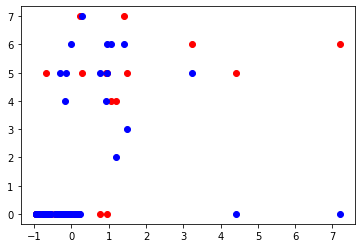

In [267]:
model= DecisionTreeRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
plt.scatter(X_test, y_predict, color = "red")
plt.scatter(X_test, y_test, color = "blue")
plt.show()
print(mean_squared_error(y_predict, y_test))

In [336]:
male=[]
female=[]
for i in range(len(Data)):
    if Data["GenderID"][i]== 1:
        male.append(Data.iloc[i,:])
    if Data["GenderID"][i]==0:
        female.append(Data.iloc[i,:])
    
m = pd.DataFrame(male)
f = pd.DataFrame(female)

In [270]:
m

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,01/07/88,M,Divorced,US Citizen,No,White,1/5/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,1,19,Production Technician I,MA,2062,02/21/74,M,Married,US Citizen,Yes,Black or African American,4/2/2012,9/19/2016,unhappy,Voluntarily Terminated,Production,Kissy Sullivan,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,"Wang, Charlie",10172,0,0,1,1,3,3,0,84903,0,22,Senior BI Developer,MA,1887,07/08/81,M,Single,US Citizen,No,Asian,2/15/2017,NaN,N/A-StillEmployed,Active,IT/IS,Brian Champaigne,13.0,Indeed,Fully Meets,3.42,4,7,1/4/2019,0,17
300,"Whittier, Scott",10072,0,0,1,5,5,3,0,58371,1,19,Production Technician I,MA,2030,05/24/87,M,Single,US Citizen,Yes,White,1/10/2011,5/15/2014,hours,Voluntarily Terminated,Production,Webster Butler,39.0,LinkedIn,Fully Meets,5.00,5,0,5/15/2014,0,11
301,"Wilber, Barry",10048,1,1,1,5,5,3,0,55140,1,19,Production Technician I,MA,2324,09/09/65,M,Married,Eligible NonCitizen,No,White,5/16/2011,9/7/2015,unhappy,Voluntarily Terminated,Production,Amy Dunn,11.0,Website,Fully Meets,5.00,3,0,2/15/2015,0,7
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,1,20,Production Technician II,MA,2045,11/07/58,M,Single,US Citizen,No,White,1/7/2013,2/21/2016,retiring,Voluntarily Terminated,Production,Brannon Miller,12.0,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7


In [271]:
f

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,05/22/77,F,Single,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Wolk, Hang T",10174,0,0,0,1,5,3,0,60446,0,20,Production Technician II,MA,2302,04/20/85,F,Single,US Citizen,No,White,9/29/2014,NaN,N/A-StillEmployed,Active,Production,David Stanley,14.0,LinkedIn,Fully Meets,3.40,4,0,2/21/2019,0,14
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


<AxesSubplot:>

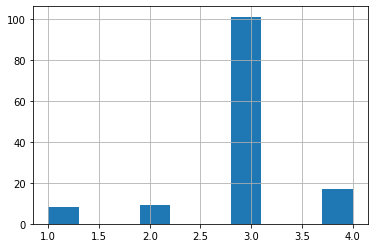

In [272]:
m["PerfScoreID"].hist()
plt.xlabel("Performance score")
plt.ylabel("Males")
plt.show()

<AxesSubplot:>

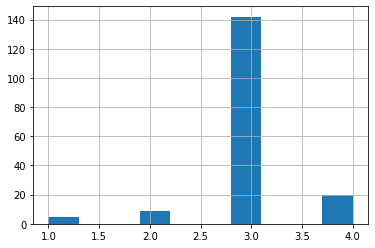

In [273]:
f["PerfScoreID"].hist()
plt.xlabel("Performance score")
plt.ylabel("Females")
plt.show()

<AxesSubplot:>

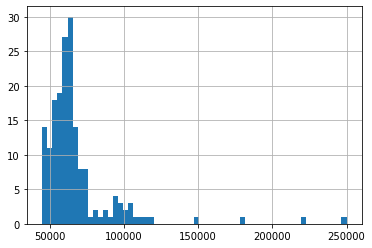

In [274]:
f["Salary"].hist(bins = 60)
plt.xlabel("Salary in $")
plt.ylabel("Females")
plt.show()

<AxesSubplot:>

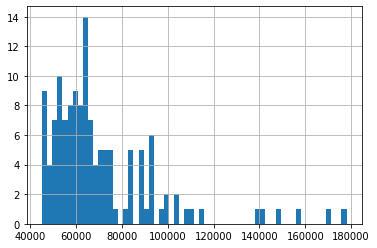

In [275]:
m["Salary"].hist(bins = 60)
plt.xlabel("Salary in $")
plt.ylabel("males")
plt.show()

In [337]:
m = m.drop(["DeptID"], axis = 1)
m = m.drop(["GenderID"], axis = 1)
m = m.drop(["Termd"], axis = 1)
m = m.drop(["Zip"], axis = 1)
m = m.drop(["EmpStatusID"], axis = 1)
m = m.drop(["FromDiversityJobFairID"],axis = 1)
m = m.drop(["PositionID"],axis = 1)
m = m.drop(["EmpID"],axis = 1)
m = m.drop(["MaritalStatusID"],axis = 1)
m = m.drop(["MarriedID"], axis=1)
m = m.drop(["ManagerID"],axis=1)
m = m.drop(["Absences"],axis=1)

In [338]:
f = f.drop(["DeptID"], axis = 1)
f = f.drop(["GenderID"], axis = 1)
f = f.drop(["Termd"], axis = 1)
f = f.drop(["Zip"], axis = 1)
f = f.drop(["EmpStatusID"], axis = 1)
f = f.drop(["FromDiversityJobFairID"],axis = 1)
f = f.drop(["PositionID"],axis = 1)
f = f.drop(["EmpID"],axis = 1)
f = f.drop(["MaritalStatusID"],axis = 1)
f = f.drop(["MarriedID"], axis=1)
f = f.drop(["Absences"],axis=1)
f = f.drop(["ManagerID"],axis=1)

In [342]:
f = f.reset_index()

In [343]:
f = f.drop(["index"],axis = 1)
display(f)

,Employee_Name,PerfScoreID,Salary,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Akinkuolie, Sarah",3,64955,Production Technician II,MA,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0
1,"Alagbe,Trina",3,64991,Production Technician I,MA,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,1/3/2019,0
2,"Anderson, Carol",3,50825,Production Technician I,MA,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,2/1/2016,0
3,"Anderson, Linda",4,57568,Production Technician I,MA,05/22/77,F,Single,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0
4,"Andreola, Colby",3,95660,Software Engineer,MA,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,"Wolk, Hang T",3,60446,Production Technician II,MA,04/20/85,F,Single,US Citizen,No,White,9/29/2014,NaN,N/A-StillEmployed,Active,Production,David Stanley,LinkedIn,Fully Meets,3.40,4,0,2/21/2019,0
172,"Ybarra, Catherine",1,48513,Production Technician I,MA,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,Google Search,PIP,3.20,2,0,9/2/2015,5
173,"Zamora, Jennifer",4,220450,CIO,MA,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0
174,"Zhou, Julia",3,89292,Data Analyst,MA,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0


In [344]:
m =m.reset_index()


In [345]:
m = m.drop(["index"],axis = 1)
display(m)

,Employee_Name,PerfScoreID,Salary,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Adinolfi, Wilson K",4,62506,Production Technician I,MA,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0
1,"Ait Sidi, Karthikeyan",3,104437,Sr. DBA,MA,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2/24/2016,0
2,"Athwal, Sam",3,59365,Production Technician I,MA,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0
3,"Bacong, Alejandro",3,50178,IT Support,MA,01/07/88,M,Divorced,US Citizen,No,White,1/5/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,Indeed,Fully Meets,5.00,5,6,2/18/2019,0
4,"Barbara, Thomas",3,47211,Production Technician I,MA,02/21/74,M,Married,US Citizen,Yes,Black or African American,4/2/2012,9/19/2016,unhappy,Voluntarily Terminated,Production,Kissy Sullivan,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,"Wang, Charlie",3,84903,Senior BI Developer,MA,07/08/81,M,Single,US Citizen,No,Asian,2/15/2017,NaN,N/A-StillEmployed,Active,IT/IS,Brian Champaigne,Indeed,Fully Meets,3.42,4,7,1/4/2019,0
131,"Whittier, Scott",3,58371,Production Technician I,MA,05/24/87,M,Single,US Citizen,Yes,White,1/10/2011,5/15/2014,hours,Voluntarily Terminated,Production,Webster Butler,LinkedIn,Fully Meets,5.00,5,0,5/15/2014,0
132,"Wilber, Barry",3,55140,Production Technician I,MA,09/09/65,M,Married,Eligible NonCitizen,No,White,5/16/2011,9/7/2015,unhappy,Voluntarily Terminated,Production,Amy Dunn,Website,Fully Meets,5.00,3,0,2/15/2015,0
133,"Winthrop, Jordan",4,70507,Production Technician II,MA,11/07/58,M,Single,US Citizen,No,White,1/7/2013,2/21/2016,retiring,Voluntarily Terminated,Production,Brannon Miller,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0


In [346]:
ma = m.corr("spearman")
display(ma.style.background_gradient(cmap='coolwarm'))


,PerfScoreID,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30
PerfScoreID,1.000000,0.131414,0.382015,0.259380,0.046942,-0.722210
Salary,0.131414,1.000000,-0.103973,0.096094,0.592608,-0.072472
EngagementSurvey,0.382015,-0.103973,1.000000,0.093567,0.017145,-0.411944
EmpSatisfaction,0.259380,0.096094,0.093567,1.000000,0.079364,-0.230521
SpecialProjectsCount,0.046942,0.592608,0.017145,0.079364,1.000000,-0.104110
DaysLateLast30,-0.722210,-0.072472,-0.411944,-0.230521,-0.104110,1.000000


In [347]:
fe = f.corr("spearman")
display(fe.style.background_gradient(cmap='coolwarm'))

,PerfScoreID,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30
PerfScoreID,1.000000,0.059944,0.376494,0.157173,0.008857,-0.638820
Salary,0.059944,1.000000,0.159031,-0.000198,0.420885,-0.082237
EngagementSurvey,0.376494,0.159031,1.000000,0.152374,0.025313,-0.451081
EmpSatisfaction,0.157173,-0.000198,0.152374,1.000000,-0.041242,-0.178897
SpecialProjectsCount,0.008857,0.420885,0.025313,-0.041242,1.000000,-0.055922
DaysLateLast30,-0.638820,-0.082237,-0.451081,-0.178897,-0.055922,1.000000


In [1632]:
print(m["EmpSatisfaction"].median())
print(m["SpecialProjectsCount"].mean())
print(m["Salary"].median())
print(m["EmpSatisfaction"].median())
print(m["EmpSatisfaction"].median())
print(m["EmpSatisfaction"].median())

4.0
1.451851851851852
63353.0
4.0
4.0
4.0


In [286]:

maleperf = pd.DataFrame(m["PerfScoreID"])
maleSal = pd.DataFrame(m["Salary"])
maleEngag = pd.DataFrame(m["EngagementSurvey"])
maleDaysl = pd.DataFrame(m["DaysLateLast30"])
maleEmpSatis = pd.DataFrame(m["EmpSatisfaction"])
maleProj = pd.DataFrame(m["SpecialProjectsCount"])

x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
for i in range(len(f)-len(m)):
    x1.append({"PerfScoreID":3})
maleperf= maleperf.append(x1, ignore_index = True)

for i in range(len(f)-len(m)):
    x2.append({"Salary":63353.0})
maleSal = maleSal.append(x2, ignore_index = True)

for i in range(len(f)-len(m)):
    x3.append({"EngagementSurvey":4.07})
maleEngag = maleEngag.append(x3, ignore_index = True)

for i in range(len(f)-len(m)):
    x4.append({"DaysLateLast30":0})
maleDaysl = maleDaysl.append(x4, ignore_index = True)

for i in range(len(f)-len(m)):
    x5.append({"EmpSatisfaction":4.0})
maleEmpSatis = maleEmpSatis.append(x5, ignore_index = True)

for i in range(len(f)-len(m)):
    x6.append({"SpecialProjectsCount":0.0})
maleProj = maleProj.append(x6, ignore_index = True)


In [352]:
frames = [maleperf, maleSal, maleDaysl, maleEmpSatis, maleProj, maleEngag ]
male = pd.concat(frames,axis =1)

array([[<AxesSubplot:title={'center':'PerfScoreID'}>,
        <AxesSubplot:title={'center':'Salary'}>],
       [<AxesSubplot:title={'center':'DaysLateLast30'}>,
        <AxesSubplot:title={'center':'EmpSatisfaction'}>],
       [<AxesSubplot:title={'center':'SpecialProjectsCount'}>,
        <AxesSubplot:title={'center':'EngagementSurvey'}>]], dtype=object)

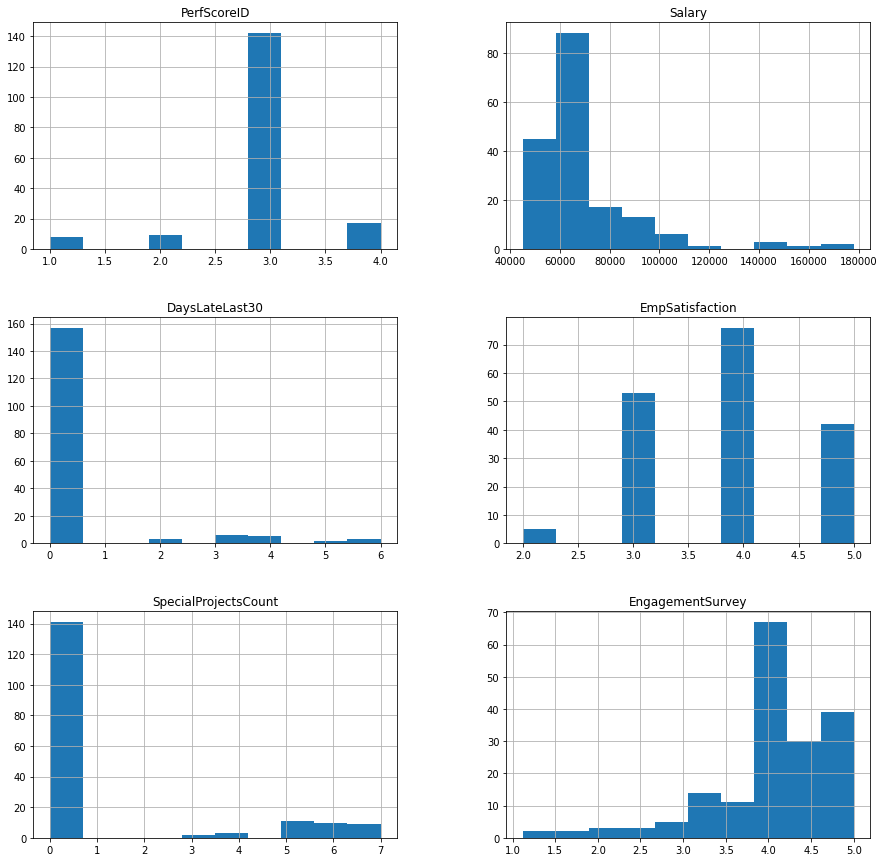

In [365]:
display(male.hist(figsize = (15,15)))

array([[<AxesSubplot:title={'center':'PerfScoreID'}>,
        <AxesSubplot:title={'center':'Salary'}>],
       [<AxesSubplot:title={'center':'EngagementSurvey'}>,
        <AxesSubplot:title={'center':'EmpSatisfaction'}>],
       [<AxesSubplot:title={'center':'SpecialProjectsCount'}>,
        <AxesSubplot:title={'center':'DaysLateLast30'}>]], dtype=object)

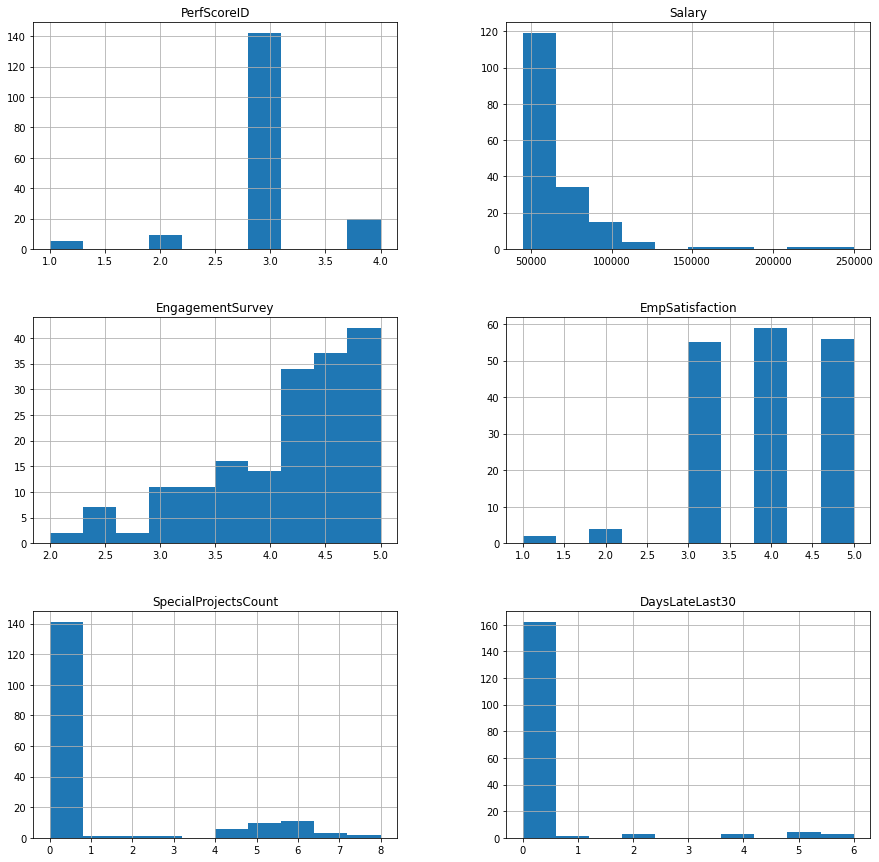

In [366]:
display(f.hist(figsize = (15,15)))

In [300]:
print(ranksums(male["EngagementSurvey"],f["EngagementSurvey"]))

RanksumsResult(statistic=-1.1822032962603373, pvalue=0.2371250450498933)

In [301]:
print(ranksums(male["Salary"],f["Salary"]))

RanksumsResult(statistic=1.5310501705666664, pvalue=0.12575699362026638)

In [302]:
print(ranksums(male["SpecialProjectsCount"],f["SpecialProjectsCount"]))

RanksumsResult(statistic=0.0974257036351009, pvalue=0.9223883332713025)

In [303]:
print(ranksums(male["EmpSatisfaction"],f["EmpSatisfaction"]))

RanksumsResult(statistic=-0.6269815443613752, pvalue=0.5306713329128695)

In [304]:
print(ranksums(male["PerfScoreID"],f["PerfScoreID"]))

RanksumsResult(statistic=-0.5138420175593225, pvalue=0.607362448642343)

In [1711]:
print(All.corr("spearman"))


ValueError: style is not supported for non-unique indices.